In [153]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Image deblurring demo

In [154]:
!wget -nc https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/traffic.png

--2023-07-05 15:53:15--  https://www.dais.unive.it/~bergamasco/teachingfiles/cvstuff/traffic.png
Resolving www.dais.unive.it (www.dais.unive.it)... 

157.138.20.11
Connecting to www.dais.unive.it (www.dais.unive.it)|157.138.20.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96541 (94K) [image/png]
Saving to: ‘traffic.png’

traffic.png         100%[===================>]  94,28K  --.-KB/s    in 0,1s    

2023-07-05 15:53:15 (927 KB/s) - ‘traffic.png’ saved [96541/96541]



Text(0.5, 1.0, 'Not Shifted Power Spectrum')

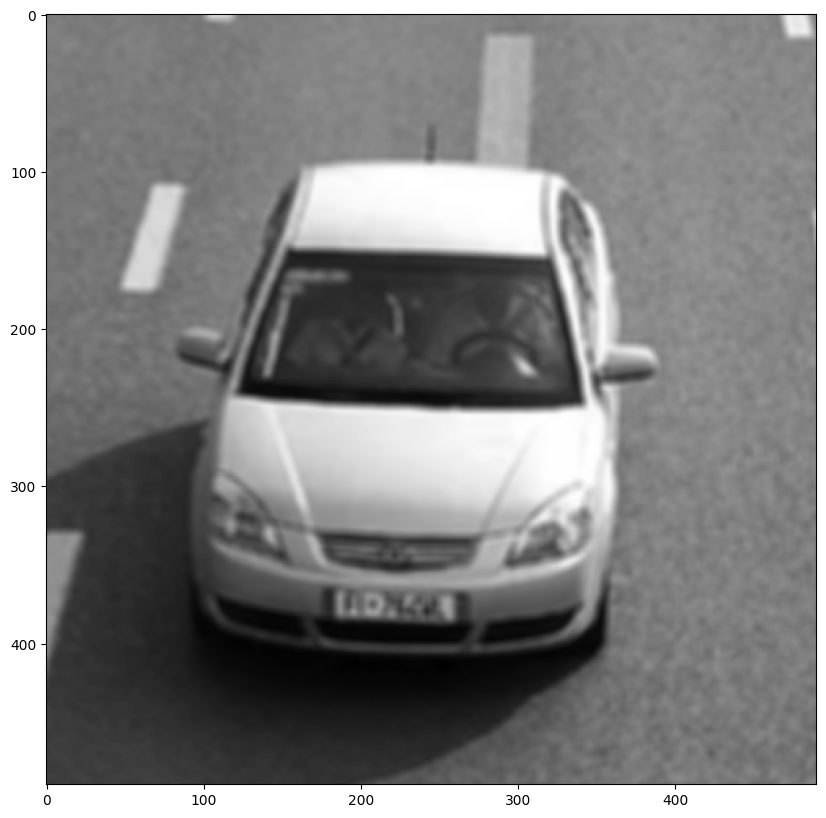

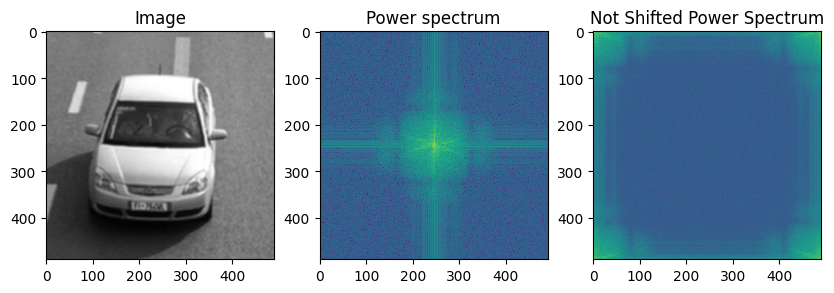

In [155]:
I = cv.imread( "traffic.png", cv.IMREAD_GRAYSCALE ) # Convert in grey scale

G = np.fft.fft2( I ) # Compute the 2-dimensional discrete Fourier Transform.

plt.figure( figsize=(10,10) )
plt.imshow(I , cmap="gray")

plt.figure( figsize=(10,30) )
plt.subplot(1,3,1)
plt.imshow(I , cmap="gray")
plt.title("Image")
plt.subplot(1,3,2)


# np.log -> dynamic range compression
# np.fft.ifftshift -> shoft spectrum
# np.abs -> absolute value

# Shift the zero-frequency component to the center of the spectrum.
plt.imshow( np.log( np.fft.fftshift(np.abs(G))), interpolation="none")
plt.title("Power spectrum")

plt.subplot(1,3,3)
plt.imshow( np.log( (np.abs(G))))
plt.title("Not Shifted Power Spectrum")


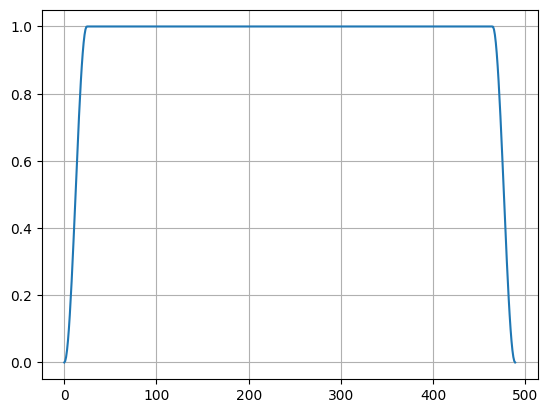

In [156]:
# Mask the image boundaries to reduce artefacts

tukey_window = signal.windows.tukey( I.shape[0], 0.1)
w = np.expand_dims( tukey_window , axis=-1 ) # I expand the dimension of the np.array inserting a new axis at the end of the shape
plt.figure()
plt.plot(w)
plt.grid()

In [157]:
I.shape, w.shape, (w@w.T).shape

((490, 490), (490, 1), (490, 490))

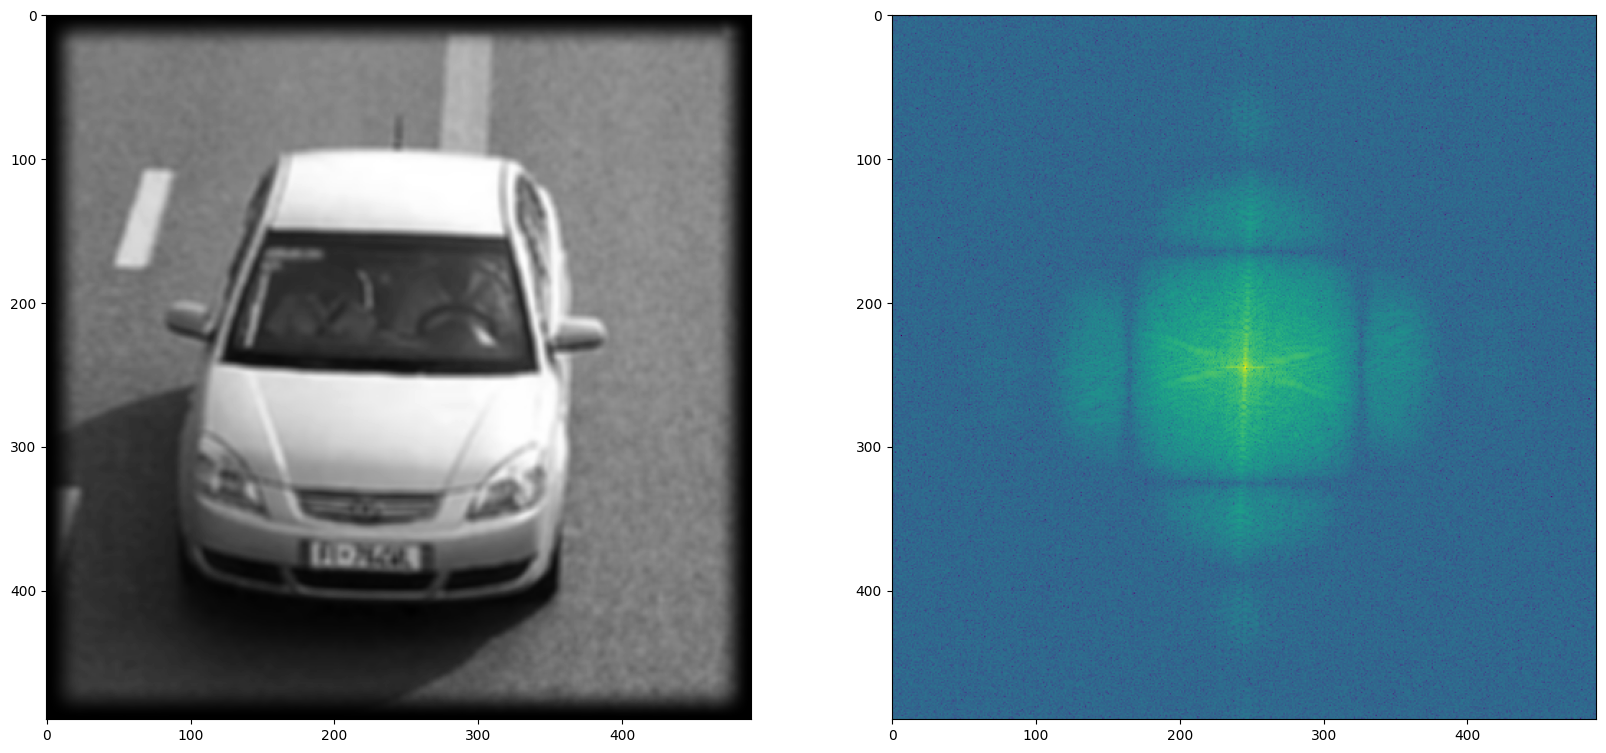

In [158]:
I = I * (w@w.T) # Apply a transformation to the image
G = np.fft.fft2( I ) # compute the 2D-DFT of the transformed image

plt.figure( figsize=(20,10) )
plt.subplot(1,2,1 )
plt.imshow(  I , cmap="gray")
plt.subplot(1,2,2 )
plt.imshow( np.log( np.fft.ifftshift(np.abs(G)))) # Compute the shifted power spectrum


In [159]:
gaussian = signal.windows.gaussian( 7, 3.0 )
w = np.expand_dims(gaussian, axis=-1)

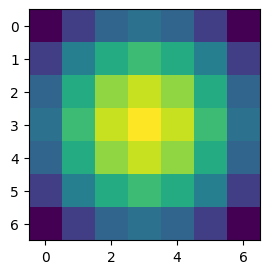

In [160]:
# Now we are computing the degradation filter
# Which in this case is a gaussian

PSF = w@w.T

PSF = PSF / np.sum(PSF)

plt.figure( figsize=(3,3) )
plt.imshow( PSF, interpolation=None)

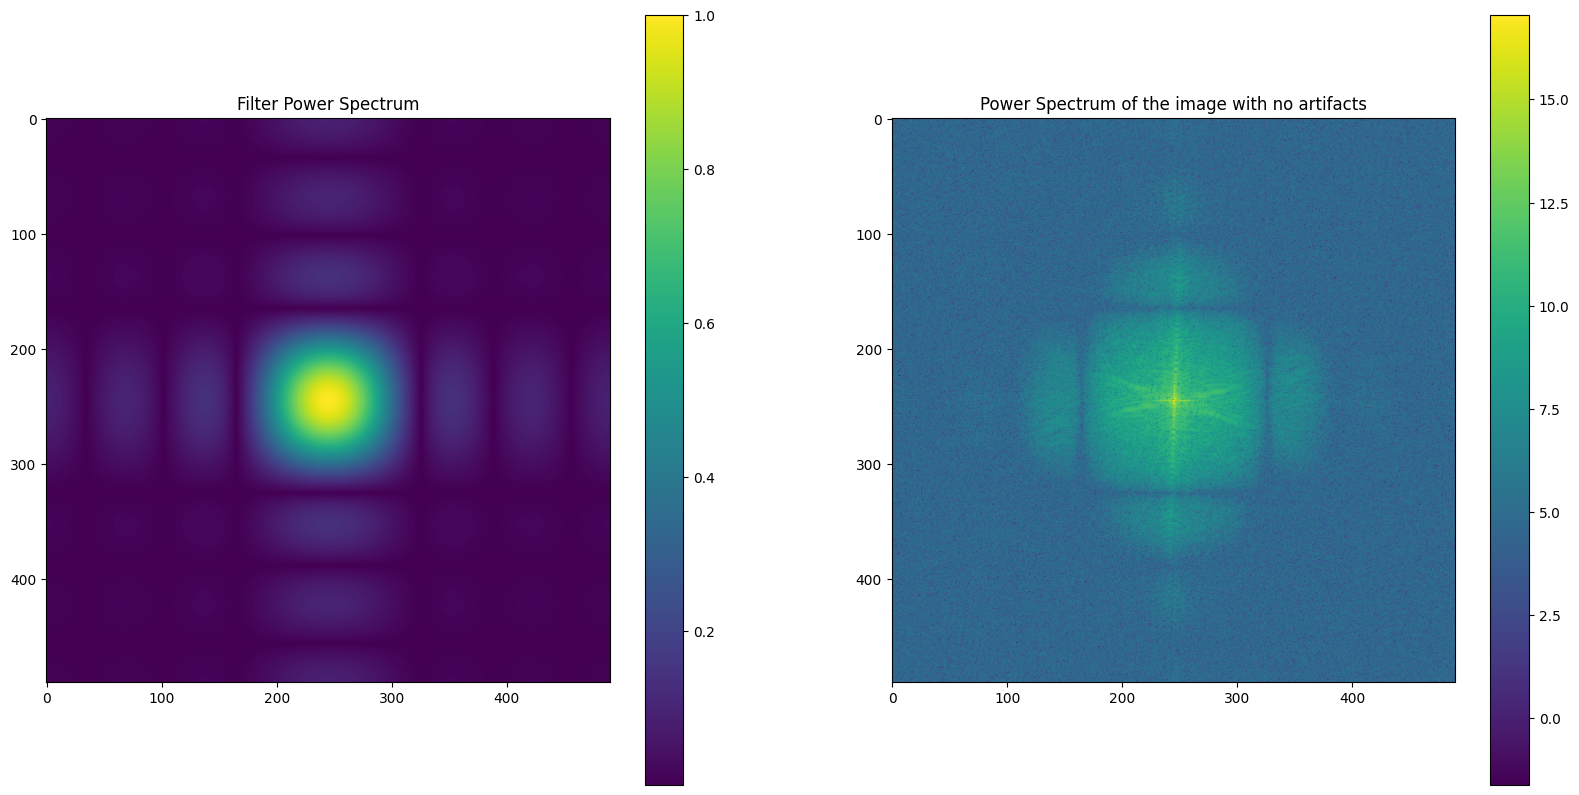

In [161]:
G = np.fft.fft2( I ) # 2D-DFT
H = np.fft.fft2( PSF, I.shape ) # Convert filter in frequency domain

plt.figure( figsize=(20,10) )
plt.subplot(1,2,1 )
plt.title("Filter Power Spectrum")
plt.imshow( np.fft.ifftshift(np.abs(H))) # no need to do the logithmic transofrmation since the value are already compressed
plt.colorbar()
plt.subplot(1,2,2 )
plt.title("Power Spectrum of the image with no artifacts")
plt.imshow( np.log( np.fft.ifftshift(np.abs(G))))
plt.colorbar()

Fhat = np.conj(H) / ( (np.conj(H)*H) + 0.0001 ) * G
									 # 0.0001 -> Noise to signal rateo


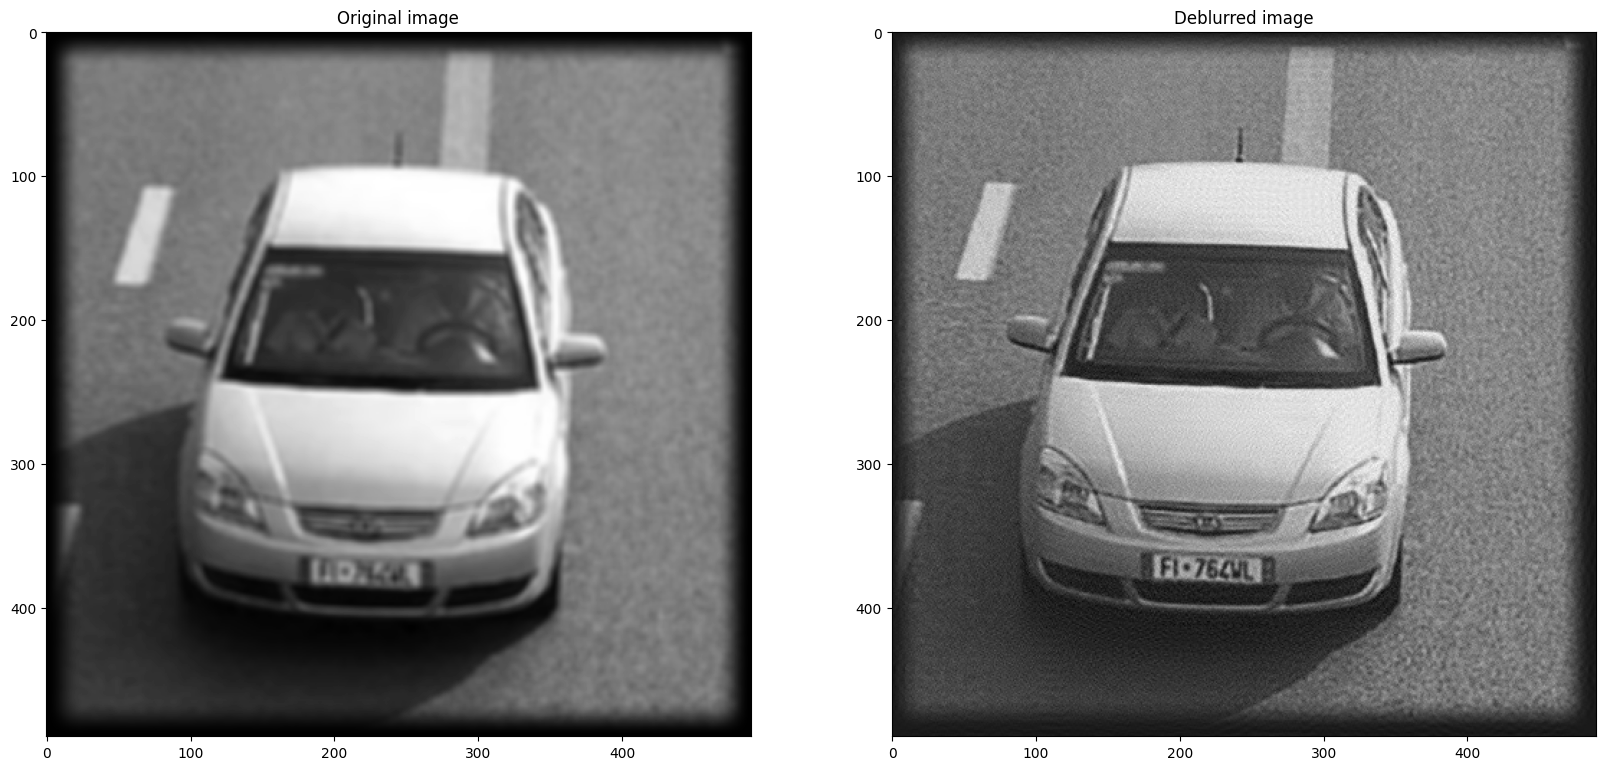

In [162]:
# We take the real part of the inverse fourier transform of Fhat
Ideb = np.real( np.fft.ifft2(Fhat) )

plt.figure( figsize=(20,10) )
plt.subplot(1,2,1)
plt.imshow(I, cmap="gray")
plt.title("Original image")
plt.subplot(1,2,2)
plt.title("Deblurred image")
plt.imshow(Ideb, cmap="gray")

This is not jist sharpening, it's inverting the convolutionof the image

In [163]:
! rm traffic.png